In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [111]:
A = 238
a = (0.123*A**(1.0/3.0) + 0.08)*1e-14   # m
I = 0
J = 0.5
E_i = 80.749  # eV
Gamma_i = 24.865
Gamma_ni = 1.865
Gamma_gi = 23.0
c = 2.99792458e8  # m/s
m = 939.57e6/c**2 # eV/c^2 = eV s^2/m^2
hbar = 4.135667662e-15/(2.0*np.pi)  # eV s

In [112]:
gJ = (2*J+1)/(2*(2*I+1))

In [113]:
def wavelength(E) : 
    return hbar/np.sqrt(2.0*E*A*m/(A+1)) # eV s/sqrt(eV eV s^2 / m^2) = m

In [114]:
def sigma0(E) :
    return 4.0*np.pi*wavelength(E)**2*gJ*Gamma_ni/Gamma_i  # m^2

In [115]:
def sigmap(E) :
    lmbda = wavelength(E)
    return 4.0*np.pi*lmbda**2*np.sin(a/lmbda)**2

In [116]:
def sigma_g(E) :
    return sigma0(E)*Gamma_gi*Gamma_i/(Gamma_i**2 + 4.0*(E-E_i)**2)
def sigma_e(E) :
    phi0 = a/wavelength(E)
    return sigmap(E)**2 + sigma0(E)*(2/Gamma_i*(E-E_i)*np.sin(2.0*phi0) + Gamma_ni/Gamma_i - 2.0*np.sin(phi0)**2)*Gamma_i**2/(Gamma_i**2 + 4.0*(E-E_i)**2)

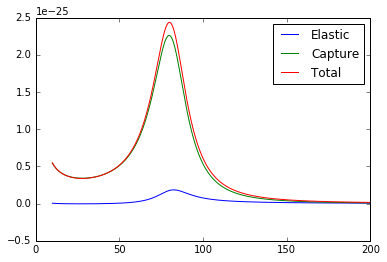

In [128]:
E = np.linspace(10,200,1000)
sigmae = sigma_e(E)
sigmag = sigma_g(E)
sigmat = sigmag+sigmae
elastic, = plt.plot(E,sigmae)
capture, = plt.plot(E,sigmag)
total,   = plt.plot(E,sigmat)
plt.legend([elastic,capture,total],["Elastic","Capture","Total"])